In [2]:
%reset

import numpy as np
import pickle as pk
import matplotlib
import matplotlib.pyplot as pl
from astropy import units
from astropy import constants
# import matplotlib
from astropy.io import fits
import sys, os
import dill
# %pylab inline

# Color = ['#0072b1','#009d73','#d45e00','k', 'grey','yellow']

Color = ['k', '#000075', '#a9a9a9','#9A6324', '#808000','#aaffc3', '#fffac8'  ,'#800000', '#ffd8b1',]


font = {'size'   : 18}
matplotlib.rc('font', **font)
# # Latex stuff
pl.rc('text', usetex=True)
pl.rc('font', family='serif')

# %matplotlib inline






Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


4357
1044
126


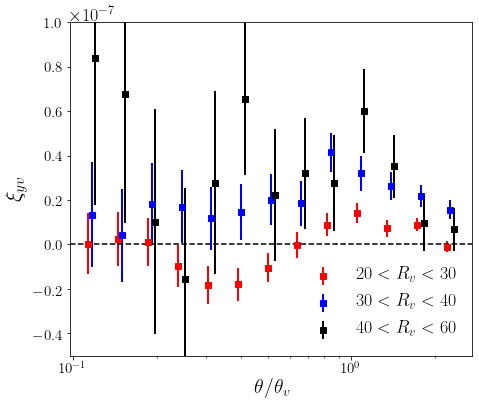

In [3]:

rv_bins = [[20,30],[30,40],[40,60]]
labels = [r'$20 < R_v < 30$', r'$30 < R_v < 40$', r'$40 < R_v < 60$']
colors = ['r','b','k']
fig, ax = pl.subplots(1,1, figsize = (7,6))
for jr in range(len(rv_bins)):
    df = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/dy/dy_planck_fwhm_10arcmin_nside2048__cat_void_z_0.15_0.6_R_20.0_80.0_dojk_True_njk_60_desy3_w1_loghres.pk','rb'))   
    xi_all = df['xi_all']
    theta_thv_all = df['theta_thv_all']
    thv_all = df['thv_data']
    theta_all = df['theta_all_data']
    rv_all = df['rv']
    zv_all = df['z']


    selz = np.where((rv_all > rv_bins[jr][0]) & (rv_all < rv_bins[jr][1]) & (zv_all > 0.2) & (zv_all < 0.6) )[0]
    xi_all, theta_thv_all = xi_all[selz,:], theta_thv_all[selz,:]
    thv_all = thv_all[selz]
    theta_all = theta_all[selz, :]
    print(len(selz))
    
    xi_mean = np.mean(xi_all, axis=0)
    
    nv = xi_all.shape[0]
    nrad = xi_all.shape[1]
    xi_big_all = np.zeros_like(xi_all)
    for jv in range(nv):
        ind_all = np.arange(nv)
        ind_rm1 = np.delete(ind_all,jv)
        xi_rm1 = np.mean(xi_all[ind_rm1,:], axis=0)
        xi_big_all[jv,:] = xi_rm1

    xi_mean_rep = np.tile(xi_mean.reshape(1,nrad),(nv,1)) 


    xi_cov = ((nv-1)/(nv))*np.dot((xi_big_all - xi_mean_rep).T , (xi_big_all - xi_mean_rep))


# for j in range(xi_all.shape[0]):
#     ax.errorbar(theta_thv_all[j,:],xi_all[j,:],ls='-',marker='',lw=0.5,color='black')
# ax.errorbar(theta_thv_all[0,:],xi_mean,ls='-',marker='',lw=0.5,color='black')
#     ax.errorbar(theta_thv_all[0,:] + 0.02*jr,xi_mean, np.sqrt(np.diag(xi_cov)),ls='',marker='s',lw=2.0,color=colors[jr],label=labels[jr])
    ax.errorbar(theta_thv_all[0,:] * (1.03**jr),xi_mean, np.sqrt(np.diag(xi_cov)),ls='',marker='s',lw=2.0,color=colors[jr],label=labels[jr])
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\theta/\theta_v$', size = 20)
ax.axhline(0.0, ls='--',color='k')
ax.set_ylabel(r'$\xi_{yv}$', size = 22)
ax.set_ylim(-5e-8,1e-7)
# ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()









In [190]:
# save_data = {'ra':datapoint_ra, 'dec':datapoint_dec, 'z':datapoint_z, 'rv':datapoint_radius,'jk':datapoint_jk,
#     'xi_all':xi_all_data, 'theta_thv_all':th_thv_all_data, 'Dcom_all':Dcomv_data, 'thv_data':thetav_data, 'theta_all_data':theta_all_data}




In [193]:
xi_mean_rep.shape, xi_big_all.shape


((4357, 8), (4357, 8))

In [195]:
xi_cov.shape


(8, 8)

No handles with labels found to put in legend.


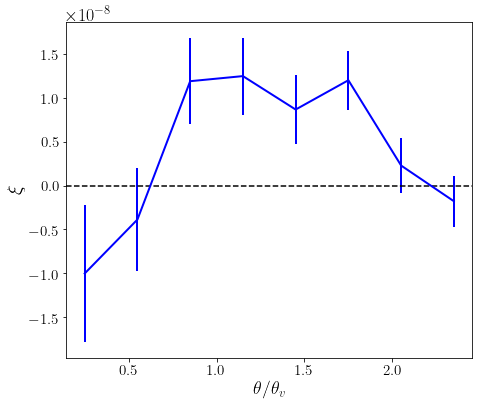

In [196]:

fig, ax = pl.subplots(1,1, figsize = (7,6))
ind = 30

# for j in range(xi_all.shape[0]):
#     ax.errorbar(theta_thv_all[j,:],xi_all[j,:],ls='-',marker='',lw=0.5,color='black')
# ax.errorbar(theta_thv_all[0,:],xi_mean,ls='-',marker='',lw=0.5,color='black')
ax.errorbar(theta_thv_all[0,:],xi_mean, np.sqrt(np.diag(xi_cov)),ls='-',marker='',lw=2.0,color='blue')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\theta/\theta_v$', size = 18)
ax.axhline(0.0, ls='--',color='k')
ax.set_ylabel(r'$\xi$', size = 20)
# ax.set_ylim(1e-5,3e4)
# ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()






In [117]:
theta_all


array([[ 14.67754561,  32.29060034,  49.90365508, ..., 102.74281927,
        120.35587401, 137.96892874],
       [ 12.26290109,  26.97838241,  41.69386372, ...,  85.84030766,
        100.55578897, 115.27127028],
       [ 15.97143814,  35.13716392,  54.30288969, ..., 111.80006701,
        130.96579278, 150.13151855],
       ...,
       [ 16.88052874,  37.13716322,  57.3937977 , ..., 118.16370115,
        138.42033563, 158.67697011],
       [ 13.83666162,  30.44065557,  47.04464951, ...,  96.85663135,
        113.4606253 , 130.06461924],
       [ 12.47024513,  27.43453929,  42.39883346, ...,  87.29171594,
        102.2560101 , 117.22030426]])

No handles with labels found to put in legend.


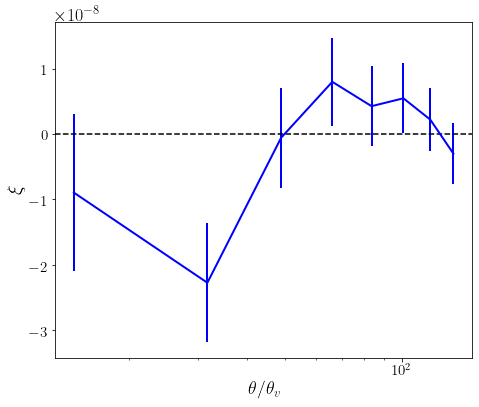

In [119]:

fig, ax = pl.subplots(1,1, figsize = (7,6))
ind = 30

# for j in range(xi_all.shape[0]):
#     ax.errorbar(theta_thv_all[j,:],xi_all[j,:],ls='-',marker='',lw=0.5,color='black')
# ax.errorbar(theta_thv_all[0,:],xi_mean,ls='-',marker='',lw=0.5,color='black')
ax.errorbar(np.mean(theta_all,axis=0),xi_mean, np.sqrt(np.diag(xi_cov)),ls='-',marker='',lw=2.0,color='blue')
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\theta/\theta_v$', size = 18)
ax.axhline(0.0, ls='--',color='k')
ax.set_ylabel(r'$\xi$', size = 20)
# ax.set_ylim(1e-5,3e4)
# ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()





